In [1]:
import sympy as sy
sy.init_printing()

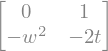

In [2]:
t, w = sy.symbols('t w')
M = sy.Matrix([[0, 1],
               [-w**2, -2*t]])
M

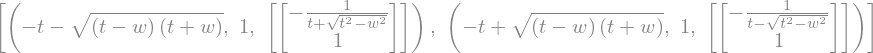

In [3]:
M.eigenvects()

So, the eigenvalues are $\lambda_{\pm} = -\tau \pm \sqrt{\tau^2 - \omega_0^2} = -\tau \pm \omega$ and the eigenvectors:
$$
    u_{\pm} = 
    \begin{pmatrix}
        1 \\
        \lambda_{\pm}
    \end{pmatrix}
$$
and therefore
$$
    T = 
    \begin{pmatrix}
        1 & 1\\
        \lambda_{+} & \lambda_{-}
    \end{pmatrix}
$$

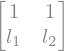

In [4]:
l1, l2 = sy.symbols('l1 l2')
T = sy.Matrix([[1, 1],
               [l1, l2]])
T

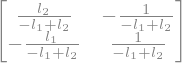

In [5]:
Ti = T.inv()
Ti
# sy.simplify(Ti * T)

The inverse is given by
$$
    T = \frac{1}{\lambda_+ - \lambda_-}
    \begin{pmatrix}
        -\lambda_- & 1\\
        \lambda_+ & -1
    \end{pmatrix}
$$

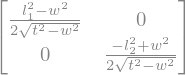

In [6]:
sy.simplify((Ti * M * T).subs(l1, -t + sy.sqrt(t**2 - w**2)).subs(l2, -t - sy.sqrt(t**2 - w**2))).subs(-t - sy.sqrt(t**2 - w**2), l2).subs(-t + sy.sqrt(t**2 - w**2), l1)

Almost!

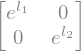

In [7]:
D = sy.Matrix([[l1, 0],
               [0, l2]])
De = sy.exp(D)
De

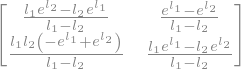

In [8]:
sy.simplify(T * De * Ti)

So we find
$$
Te^{Dt}T^{-1} = \frac{1}{\lambda_+ - \lambda_-}
\begin{pmatrix}
    \lambda_+ e^{\lambda_- t} - \lambda_- e^{\lambda_+ t} & e^{\lambda_+ t} - e^{\lambda_- t} \\
    \lambda_+\lambda_- (e^{\lambda_- t} - e^{\lambda_+ t}) & \lambda_+ e^{\lambda_+ t} - \lambda_- e^{\lambda_- t} 
\end{pmatrix} = \frac{1}{2 \omega}
\begin{pmatrix}
    e^{-\tau t} (\omega(e^{\omega t} + e^{\omega t}) + \tau(e^{\omega t} - e^{-\omega t}) ) & e^{-\tau t} (e^{\omega t} - e^{-\omega t}) \\
    \omega_0 e^{-\tau t}(e^{-\omega t} + e^{\omega t}) & e^{-\tau t}(\omega(e^{\omega t} + e^{-\omega t}) - \tau(e^{\omega t} - e^{-\omega t}))
\end{pmatrix}
$$

So we find
$$
    r(t) = (T e^{Dt} T^{-1}x(0))_1 = 
    \frac{1}{2 \omega} (r_0 e^{-\tau t} (\omega(e^{\omega t} + e^{\omega t}) + \tau(e^{\omega t} + e^{-\omega t}) ) + v_0 e^{-\tau t} (e^{\omega t} - e^{-\omega t}))
$$